In [188]:
import numpy as np
import pandas as pd

import ast

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")


In [189]:
file_list = [
    "Close_source/PostProcess_GPT_4o_mini_evaluate.csv",
    "Close_source/PostProcess_Gemini_2.0_flash_evaluate.csv",
    "Close_source/PostProcess_Deepseek_V3_evaluate.csv",
    "Close_source/PostProcess_Claude_3.5_Haiku_evaluate.csv",

    "Open_source/General_support/llama-3-7b_evaluate.csv",
    "Open_source/General_support/mistral-7b-instruct-v0.3_evaluate.csv",
    "Open_source/General_support/qwen2.5-7b-instruct-1m_evaluate.csv",
    "Open_source/General_support/vicuna-7b-v1.5_evaluate.csv",
    "Open_source/General_support/wizardlm-2-7b_evaluate.csv",

    "Open_source/Vietnamese_support/vistral-7b-chat_evaluate.csv",
    "Open_source/Vietnamese_support/qwen2.5-7b-instruct-viet-sft_evaluate.csv",
]

In [190]:
def castString(s):
    if type(s)!=str:
        return 'không'
    
    s = s.strip().lower()
        
    position1 = s.find('có')
    position2 = s.find('không')

    if position1 != -1 and position2 != -1:
        if position1 <= position2:
            return 'có'
        else:
            return 'không'
        
    if 'có' in s:
        return 'có'
    if 'không' in s:
        return 'không'
    
    if "yes" in s:
        return "có"
    if "no" in s:
        return "không"
    
    return 'không'


In [191]:
data = {}

def demoPlot1(file_name):
    df = pd.read_csv(file_name)

    df['danhGiaDung'] = df['danhGiaDung'].apply(castString)
    df['danhGiaAoGiac'] = df['danhGiaAoGiac'].apply(castString)

    name = file_name.split("/")[-1].split("_evaluate")[0].split('PostProcess_')[-1]

    TN = df[df['danhGiaDung']=='không'].shape[0]
    FN = df[df['danhGiaDung']=='có'].shape[0]
    TP = df[df['danhGiaAoGiac']=='có'].shape[0]
    FP = df[df['danhGiaAoGiac']=='không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    # Metrics calculation
    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    data[name] = [f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"]

    return accuracy, precision, recall, f1_score, TP, FP, FN, TN


In [192]:
for file in file_list:
    demoPlot1(file)
df = pd.DataFrame(data).T
df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']
df

,Accuracy,Precision,Recall,F1-score
GPT_4o_mini,0.5172,0.8840,0.5099,0.6468
Gemini_2.0_flash,0.5129,0.6965,0.5094,0.5885
Deepseek_V3,0.5026,0.8588,0.5015,0.6332
Claude_3.5_Haiku,0.4358,0.2569,0.4001,0.3129
llama-3-7b,0.5307,0.7611,0.5210,0.6186
mistral-7b-instruct-v0.3,0.4824,0.4485,0.4811,0.4642
qwen2.5-7b-instruct-1m,0.5191,0.8905,0.5110,0.6493
vicuna-7b-v1.5,0.5059,0.9968,0.5030,0.6686
wizardlm-2-7b,0.5761,0.4479,0.6024,0.5138
vistral-7b-chat,0.5091,0.0667,0.5794,0.1197


In [193]:
def calculate_accuracy(df):
    TN = df[df['danhGiaDung']=='không'].shape[0]
    FN = df[df['danhGiaDung']=='có'].shape[0]
    TP = df[df['danhGiaAoGiac']=='có'].shape[0]
    FP = df[df['danhGiaAoGiac']=='không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy

In [194]:
data = {}

def demoPlot2(file_name):
    df = pd.read_csv(file_name)

    df['danhGiaDung'] = df['danhGiaDung'].apply(castString)
    df['danhGiaAoGiac'] = df['danhGiaAoGiac'].apply(castString)

    name = file_name.split("/")[-1].split("_evaluate")[0].split('PostProcess_')[-1]

    df_1 = df[df['pattern']==0]
    df_2 = df[df['pattern']==1]
    df_3 = df[df['pattern']==2]
    df_4 = df[df['pattern']==3]

    a1 = calculate_accuracy(df_1)
    a2 = calculate_accuracy(df_2)
    a3 = calculate_accuracy(df_3)
    a4 = calculate_accuracy(df_4)

    data[name] = [f"{a1:.4f}", f"{a2:.4f}", f"{a3:.4f}", f"{a4:.4f}"]
    data[name] = [a1,a2,a3,a4]

    return a1, a2, a3, a4


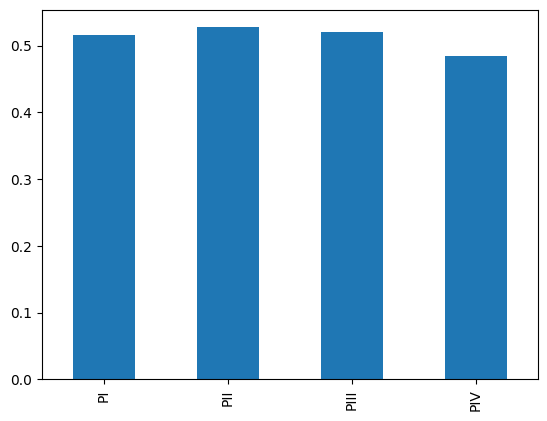

,PI,PII,PIII,PIV
GPT_4o_mini,0.522234,0.512022,0.525505,0.509052
Gemini_2.0_flash,0.513557,0.560109,0.484060,0.495208
Deepseek_V3,0.505965,0.498361,0.491498,0.514377
Claude_3.5_Haiku,0.431670,0.519126,0.424017,0.370607
llama-3-7b,0.598156,0.587432,0.561637,0.378062
mistral-7b-instruct-v0.3,0.502711,0.489071,0.465994,0.472311
qwen2.5-7b-instruct-1m,0.514642,0.514208,0.540383,0.506922
vicuna-7b-v1.5,0.504338,0.507650,0.505313,0.506390
wizardlm-2-7b,0.558026,0.544809,0.658874,0.541534
vistral-7b-chat,0.510304,0.519126,0.493624,0.513845


In [195]:
for file in file_list:
    demoPlot2(file)
df = pd.DataFrame(data).T
df.columns = ['PI', 'PII', 'PIII', 'PIV']
df.mean().plot(kind='bar')
plt.show()
df

In [196]:
data = {}

def demoPlot3(file_name):
    df = pd.read_csv(file_name)

    ref_df = pd.read_csv('Data/postgenerate_gpt.csv')[['link', 'boNganh']]

    df = pd.merge(df, ref_df, on='link', how='left')

    # display(df)

    df['danhGiaDung'] = df['danhGiaDung'].apply(castString)
    df['danhGiaAoGiac'] = df['danhGiaAoGiac'].apply(castString)

    name = file_name.split("/")[-1].split("_evaluate")[0].split('PostProcess_')[-1]

    df_dict = {value: calculate_accuracy(df[df['boNganh'] == value]) for value in df['boNganh'].unique()}
    

    data[name] = df_dict


In [201]:
for file in file_list:
    demoPlot3(file)
df = pd.DataFrame(data).T
# df.mean().plot(kind='barh')
df = df.mean().to_frame()
df.columns = ['Accuracy']
df

,Accuracy
Thanh tra Chính phủ,0.503846
Bộ Khoa học và Công nghệ ( Bộ TTTT cũ),0.512151
Bộ Y tế,0.507086
Bộ Quốc phòng,0.520674
Bộ Nông nghiệp và Môi trường,0.515642
Bộ Tài nguyên và Môi trường,0.508065
Bộ Tư pháp,0.504188
Bộ Giao thông vận tải,0.516566
Bộ Ngoại giao,0.515697
Bộ Công an,0.506952
